# AI4I 2020 Predictive Maintenance - Full Workflow with Safe Region Analysis

In [1]:
# 📦 Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, hamming_loss, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


In [2]:
# 📥 Step 2: Load Dataset
df = pd.read_csv("ai4i2020.csv")
df['Type'] = LabelEncoder().fit_transform(df['Type'])

X = df[['Type', 'Air temperature [K]', 'Process temperature [K]', 
        'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
y = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

feature_names = X.columns.tolist()
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
# 🧱 Step 3: AAS JSON Format Example
def row_to_aas_json(row):
    aas = {
        "Asset": {
            "Type": "CNC Machine",
            "Model": "AI4I-2020",
            "Submodels": {
                "OperationalData": {
                    "Type": int(row["Type"]),
                    "AirTemp[K]": float(row["Air temperature [K]"]),
                    "ProcessTemp[K]": float(row["Process temperature [K]"]),
                    "RPM": float(row["Rotational speed [rpm]"]),
                    "Torque[Nm]": float(row["Torque [Nm]"]),
                    "ToolWear[min]": float(row["Tool wear [min]"])
                },
                "FailureState": {
                    "TWF": int(row["TWF"]),
                    "HDF": int(row["HDF"]),
                    "PWF": int(row["PWF"]),
                    "OSF": int(row["OSF"]),
                    "RNF": int(row["RNF"])
                }
            }
        }
    }
    return aas

import json
print(json.dumps(row_to_aas_json(df.iloc[0]), indent=2))


{
  "Asset": {
    "Type": "CNC Machine",
    "Model": "AI4I-2020",
    "Submodels": {
      "OperationalData": {
        "Type": 2,
        "AirTemp[K]": 298.1,
        "ProcessTemp[K]": 308.6,
        "RPM": 1551.0,
        "Torque[Nm]": 42.8,
        "ToolWear[min]": 0.0
      },
      "FailureState": {
        "TWF": 0,
        "HDF": 0,
        "PWF": 0,
        "OSF": 0,
        "RNF": 0
      }
    }
  }
}


In [4]:
# 🧠 Step 4: Model Training
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(5, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_split=0.2)


C:\Users\msair\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1337 - loss: 0.3574 - val_accuracy: 0.0206 - val_loss: 0.0592
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0751 - loss: 0.0525 - val_accuracy: 0.0237 - val_loss: 0.0470
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0842 - loss: 0.0392 - val_accuracy: 0.0594 - val_loss: 0.0405
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1163 - loss: 0.0357 - val_accuracy: 0.1912 - val_loss: 0.0360
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2133 - loss: 0.0327 - val_accuracy: 0.2425 - val_loss: 0.0333
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.2062 - loss: 0.0254 - val_accuracy: 0.3475 - val_loss: 0.0303
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2852 - loss: 0.0297 - val_accuracy: 0.3294 - val_loss: 0.0283
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2879 - loss: 0.0269 - val_accuracy: 0.

In [5]:
# 📈 Step 5: Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3401 - loss: 0.0180
Test Accuracy: 0.3390
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step



Classification Report for TWF:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1989
           1       0.00      0.00      0.00        11

    accuracy                           0.99      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.99      0.99      0.99      2000



C:\Users\msair\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\msair\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\msair\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

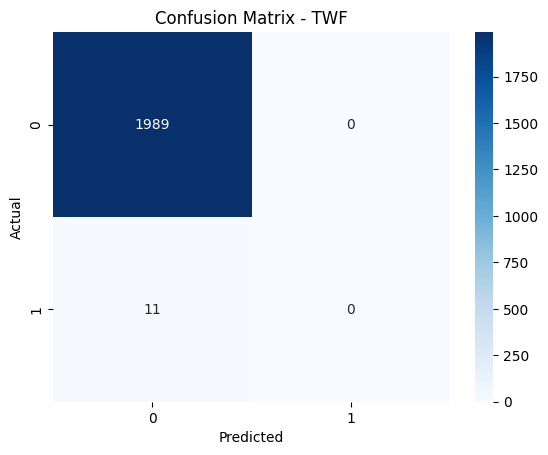


Classification Report for HDF:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1983
           1       0.75      0.18      0.29        17

    accuracy                           0.99      2000
   macro avg       0.87      0.59      0.64      2000
weighted avg       0.99      0.99      0.99      2000



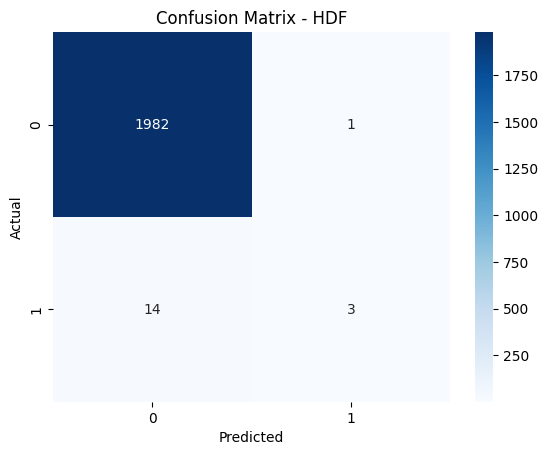


Classification Report for PWF:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1980
           1       0.92      0.55      0.69        20

    accuracy                           0.99      2000
   macro avg       0.96      0.77      0.84      2000
weighted avg       0.99      0.99      0.99      2000



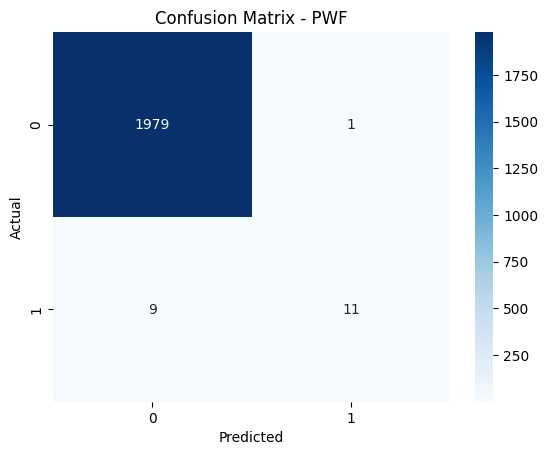


Classification Report for OSF:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1982
           1       1.00      0.50      0.67        18

    accuracy                           1.00      2000
   macro avg       1.00      0.75      0.83      2000
weighted avg       1.00      1.00      0.99      2000



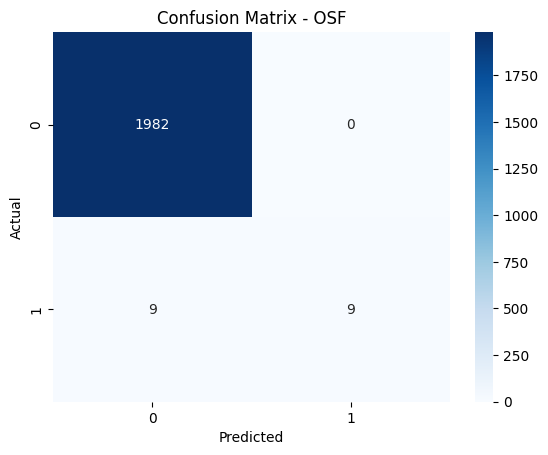


Classification Report for RNF:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1994
           1       0.00      0.00      0.00         6

    accuracy                           1.00      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.99      1.00      1.00      2000



C:\Users\msair\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\msair\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\msair\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

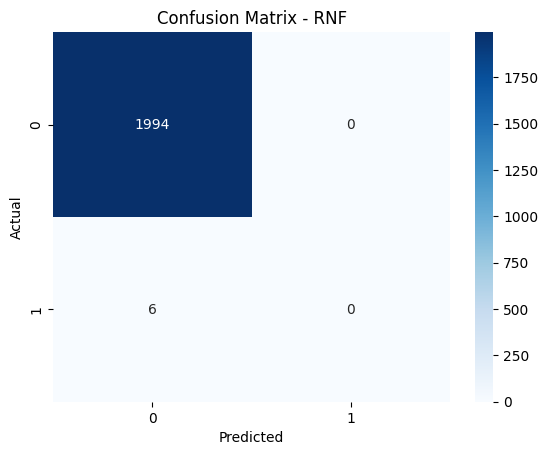

In [6]:
# 📊 Classification Reports & Confusion Matrices
for i, label in enumerate(y.columns):
    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test.iloc[:, i], y_pred_binary[:, i]))
    cm = confusion_matrix(y_test.iloc[:, i], y_pred_binary[:, i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix - {}".format(label))
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


In [7]:
# 🧪 Additional Metrics
print("Hamming Loss:", hamming_loss(y_test, y_pred_binary))
print("Subset Accuracy (Exact Match):", accuracy_score(y_test, y_pred_binary))
print("Micro Precision:", precision_score(y_test, y_pred_binary, average='micro'))
print("Micro Recall:", recall_score(y_test, y_pred_binary, average='micro'))
print("Micro F1 Score:", f1_score(y_test, y_pred_binary, average='micro'))
print("Macro Precision:", precision_score(y_test, y_pred_binary, average='macro'))
print("Macro Recall:", recall_score(y_test, y_pred_binary, average='macro'))
print("Macro F1 Score:", f1_score(y_test, y_pred_binary, average='macro'))
print("ROC AUC Score (macro):", roc_auc_score(y_test, y_pred, average='macro'))


Hamming Loss: 0.0051
Subset Accuracy (Exact Match): 0.9755
Micro Precision: 0.92
Micro Recall: 0.3194444444444444
Micro F1 Score: 0.4742268041237113
Macro Precision: 0.5333333333333333
Macro Recall: 0.24529411764705883
Macro F1 Score: 0.3279761904761905
ROC AUC Score (macro): 0.8974660914988872


C:\Users\msair\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


=== SAFE OPERATING REGION SUMMARY ===
              Type  Air temperature [K]  Process temperature [K]  \
count  1975.000000          1975.000000              1975.000000   
mean     -0.019247            -0.008945                 0.002259   
std       0.994497             0.995981                 0.993892   
min      -1.998335            -2.302282                -2.767184   
25%      -0.332223            -0.852397                -0.812558   
50%      -0.332223             0.047531                -0.003747   
75%       1.333889             0.747476                 0.737662   
max       1.333889             2.197361                 2.490085   

       Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  
count             1975.000000  1975.000000      1975.000000  
mean                -0.005264    -0.024769        -0.011663  
std                  0.912586     0.959465         1.024870  
min                 -2.068196    -2.667110        -1.695984  
25%                 -0.623489    -0.680

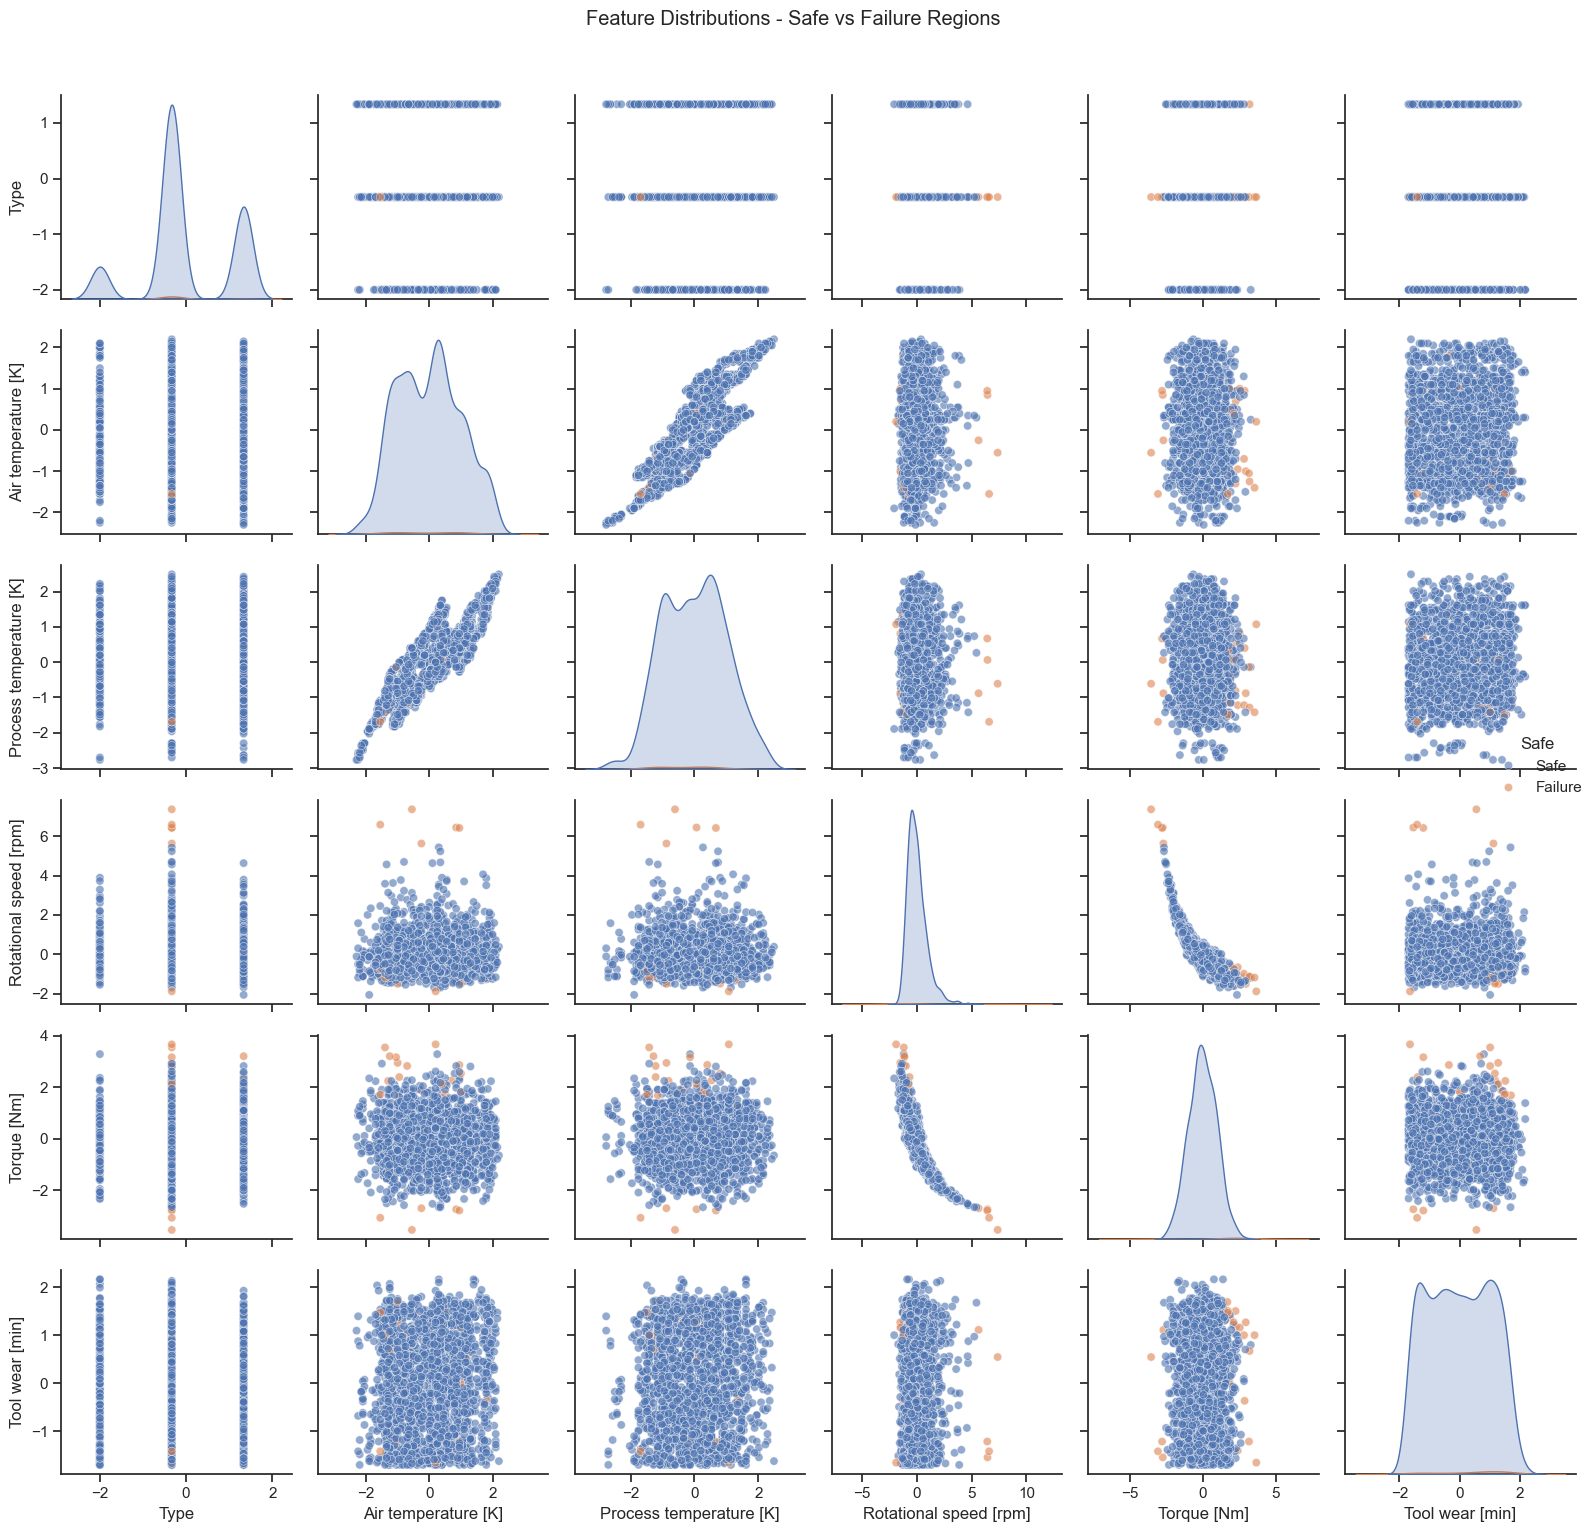

In [8]:
# 📘 Safe Operating Region Analysis
safe_mask = (y_pred_binary.sum(axis=1) == 0)
safe_samples = X_test[safe_mask]

safe_df = pd.DataFrame(safe_samples, columns=feature_names)
print("=== SAFE OPERATING REGION SUMMARY ===")
print(safe_df.describe())

# Save CSV
safe_df.to_csv("safe_region_data.csv", index=False)

# Plot distributions
X_test_copy = pd.DataFrame(X_test, columns=feature_names)
X_test_copy['Safe'] = np.where(safe_mask, 'Safe', 'Failure')

sns.set(style="ticks")
pairplot_fig = sns.pairplot(X_test_copy[feature_names + ['Safe']], hue='Safe', diag_kind='kde', plot_kws={'alpha': 0.6})
pairplot_fig.fig.suptitle("Feature Distributions - Safe vs Failure Regions", y=1.02)
plt.tight_layout()
plt.show()


In [9]:
 ! pip install tensorflow pandas scikit-learn


'pip' is not recognized as an internal or external command,
operable program or batch file.


In [10]:

# ✅ Fix: Encode categorical columns to numeric for model input
from sklearn.preprocessing import LabelEncoder

# Drop identifier column if present
if 'UDI' in df.columns:
    df = df.drop('UDI', axis=1)

# Encode string/categorical columns
label_encoders = {}
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le


In [11]:

# ✅ Model Training: Predicting Machine Failure
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Separate target
y = df["Machine failure"]
X = df.drop("Machine failure", axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


C:\Users\msair\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8859 - loss: 30.5332
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9357 - loss: 2.5330
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9289 - loss: 3.3343
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9419 - loss: 0.6969
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9451 - loss: 1.7012
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9404 - loss: 1.6252
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9442 - loss: 1.1748
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9471 - loss: 2.4258
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9506 - loss: 0.7334
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9496 - loss: 1.3861
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9679 - loss: 0.3314 
Test Accuracy: 0.9700


In [12]:

# ✅ Extract "safe" data where there is no machine failure
safe_data = df[df["Machine failure"] == 0]


In [13]:

# ✅ Save processed data
try:
    df.to_csv("processed.csv", index=False)
except:
    print("processed.csv not saved – 'df' not found.")

# ✅ Save encoded/training output data
try:
    X.to_csv("output.csv", index=False)
except:
    print("output.csv not saved – 'X' not found.")

# ✅ Save trained model
try:
    model.save("trained_model.h5")
except:
    print("Model not saved – 'model' not found or not trained.")

# ✅ Save safe_data CSV
try:
    safe_data.to_csv("safe_data.csv", index=False)
except:
    print("safe_data.csv not saved – 'safe_data' not found.")


In [14]:

# ✅ Export model input data (X) as AAS-compatible JSON
try:
    X.to_json("output.aas.json", orient="records", lines=True)
    print("AAS JSON file created: output.aas.json")
except Exception as e:
    print("Failed to create AAS JSON file:", str(e))


AAS JSON file created: output.aas.json
